In [200]:
import numpy as np
from scipy.special import eval_chebyt, eval_chebyc, roots_chebyt, roots_chebyc
from scipy.special import chebyt, chebyc
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

# create test functions for interpolation

In [2]:
xtest = np.linspace(-1,1,200)

sign_y = np.zeros(xtest.shape)
sign_y[xtest>=0] = 1

cliff_y = xtest+1
cliff_y[xtest>=0.5] = cliff_y[xtest>=0.5]-1.5

sine_y = np.sin(5*xtest*np.pi)

line_y = 2*xtest

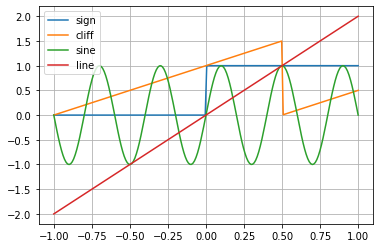

In [3]:
plt.plot(xtest,sign_y,label="sign")
plt.plot(xtest, cliff_y, label="cliff")
plt.plot(xtest, sine_y, label="sine")
plt.plot(xtest, line_y, label="line")
plt.legend()
plt.grid()

# Lagrange Interpolation

## we use equally spaced points

In [4]:
def lagrange_interp(xi,yi, xp):
    """ this function takes points xi,yi - points where function is known
        xp - points to interpolate at"""
    n = len(xi)  # number of know points, polinomial degree
    # copy and reshape inputs
    xicpy = xi.reshape(-1,1)
    yicpy = yi.reshape(-1,1)
    xpcpy = xp.reshape(-1,1)
    
    xmat = xicpy*np.ones(xicpy.shape).T
    den = xmat-xmat.T + np.eye(n)
    den = den.prod(axis=1)
    
    nom = np.ones(xpcpy.shape)
    nom = nom*xicpy.T
    nom = xpcpy-nom
    
    # interpolation loop
    res = np.zeros(xpcpy.shape[0])
    for ii in range(xicpy.shape[0]):
        tmp = nom.copy()
        tmp[:,ii] = 1
        tmp = tmp.prod(axis=1)
        res += yicpy[ii]*tmp/den[ii]
    return res

## lets plot the lagrange interpolant of the sign function

(-3.0, 3.0)

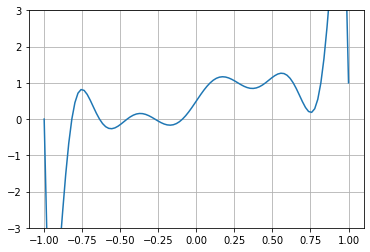

In [5]:
n = 12
p = 100
xi = np.linspace(-1,1,n)
yi = np.zeros(xi.shape)
yi[xi>=0] = 1
xp = np.linspace(-1,1,p)

lagrange_res = lagrange_interp(xi,yi,xp)
plt.plot(xp, lagrange_res)
plt.grid()
plt.ylim(-3,3)

# Chebichev interpolant

(-3.0, 3.0)

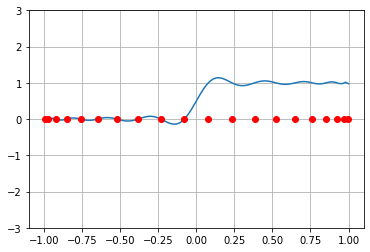

In [131]:
nc = 20  # number of chebichev interpolation points
xi = roots_chebyt(nc)[0]
yi = np.zeros(xi.shape)
yi[xi>=0] = 1
cheb_res = lagrange_interp(xi,yi,xp)  # find the interpolation with lagrange polinomial
plt.plot(xp, cheb_res)
plt.plot(xi,0*xi,'or')
plt.grid()
plt.ylim(-3,3)

In [165]:
def cheb_interp(xi,yi,xp):
    """function that calculate the chebychev interpolation of a function
    :param xi: numpy array of x points of the function at chebychev roots
    :param yi: numpy array of y values of the function at xi
    :xp: points at which to interpolate the function"""
    nc = len(xi)  # number of chebichev interpolation points
    p = len(xp)
    
    # calculate the chebichev polynomial values at degree [ii,:] at point [:,jj]
    coef = cheb_coef(xi,yi)

    
    # calculate the results
    degree = np.linspace(0,nc-1,nc).reshape(-1,1)*np.ones((1,p))
    points = np.ones((nc,1))*xp.reshape(1,-1)
    vals = eval_chebyt(degree,points)
    res = coef.reshape(-1,1)*vals
    res = res.sum(axis=0)
    return res

def cheb_coef(xi, yi):
    """ this function calculates the coefficients of the Chebychev polinomials
    given a set of points at (xi,yi) given at chebychev nodes
    :param xi: numpy array of chebychev node x values
    :param yi: numpy array of function values at points xi
    :return coef: numpy array of n Chebychev Tn polynomials coeficients, sorted by n"""
    
    nc = len(xi)
    cheb_val = cheb_vals(xi)
    coef = (2/nc)*(cheb_val*yi.reshape(1,-1)).sum(axis=1)
    coef[0] = coef[0]/2
    return coef


def cheb_vals(xi):
    """ this function calculates the values of n chebychev polynomials at n chebychev nodes
    the degree of the polynomial is the row index of the result,
    the point index is the column index of the result
    T2(x3) is stored in vals[2,3]
    :param xi: numpy array of chebychev node x values
    :return vals: numpy matrix of size ncxnc of values of the chebychev polynomials"""
    
    nc = len(xi)  # number of chebichev interpolation points
    degree = np.linspace(0,nc-1,nc).reshape(-1,1)*np.ones((1,nc))
    points = np.ones((nc,1))*xi.reshape(1,-1)
    vals = eval_chebyt(degree,points)
    return vals
    

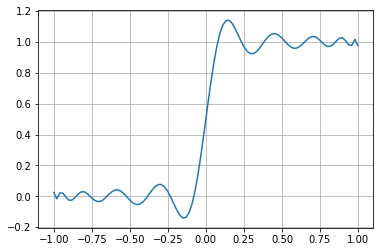

In [133]:
cheb_res = cheb_interp(xi,yi,xp)
plt.plot(xp, cheb_res)
plt.grid()

## We can also get the coefficients of the polynomials which uniquely represent the function

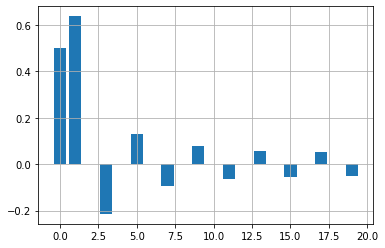

In [138]:
coefs = cheb_coef(xi,yi)
coefs
plt.bar(np.arange(0,len(coefs)), coefs)
plt.grid()

# Now let's compare on the 3 test functions

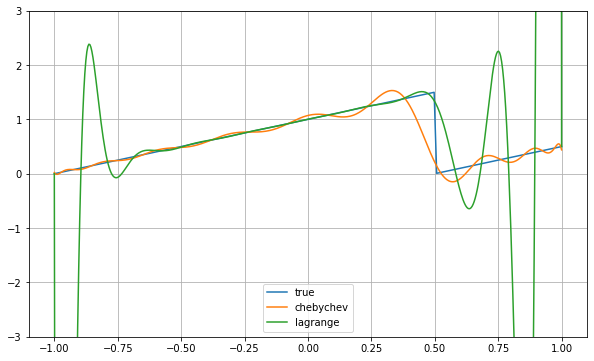

In [171]:
num_terms = 20
# define x points
x_cheb = roots_chebyt(num_terms)[0]
x_lag = np.linspace(-1,1,num_terms)
xp = np.linspace(-1,1,500)

# define y values
y_cheb = x_cheb + 1
y_cheb[x_cheb>=0.5] = y_cheb[x_cheb>=0.5]-1.5

y_lag = x_lag+1
y_lag[x_lag>=0.5] = y_lag[x_lag>=0.5]-1.5

y_res_c = cheb_interp(x_cheb, y_cheb, xp)
y_res_l = lagrange_interp(x_lag, y_lag, xp)

plt.figure(figsize=(10,6))
plt.plot(xtest,cliff_y, label='true')
plt.plot(xp,y_res_c, label='chebychev')
plt.plot(xp,y_res_l, label='lagrange')
plt.grid()
plt.ylim(-3,3)
plt.legend()

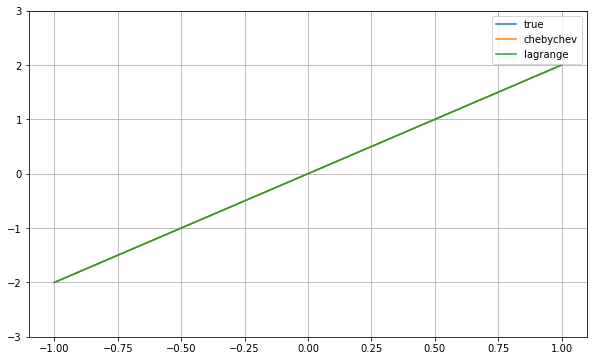

In [173]:
num_terms = 20
# define x points
x_cheb = roots_chebyt(num_terms)[0]
x_lag = np.linspace(-1,1,num_terms)
xp = np.linspace(-1,1,500)

# define y values
y_cheb = 2*x_cheb

y_lag = 2*x_lag

y_res_c = cheb_interp(x_cheb, y_cheb, xp)
y_res_l = lagrange_interp(x_lag, y_lag, xp)

plt.figure(figsize=(10,6))
plt.plot(xtest,line_y, label='true')
plt.plot(xp,y_res_c, label='chebychev')
plt.plot(xp,y_res_l, label='lagrange')
plt.grid()
plt.ylim(-3,3)
plt.legend()

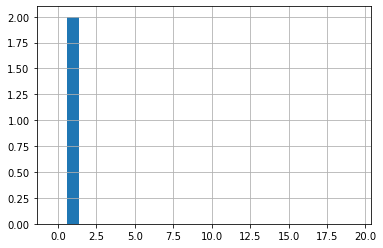

In [174]:
coefs = cheb_coef(x_cheb,y_cheb)
plt.bar(np.arange(0,len(coefs)), coefs)
plt.grid()

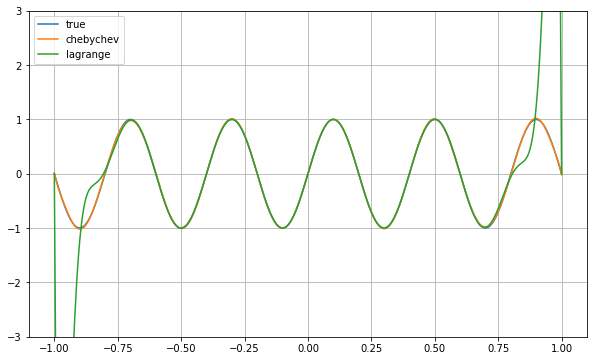

In [175]:
num_terms = 20
# define x points
x_cheb = roots_chebyt(num_terms)[0]
x_lag = np.linspace(-1,1,num_terms)
xp = np.linspace(-1,1,500)

# define y values
y_cheb = np.sin(5*x_cheb*np.pi)

y_lag = np.sin(5*x_lag*np.pi)

y_res_c = cheb_interp(x_cheb, y_cheb, xp)
y_res_l = lagrange_interp(x_lag, y_lag, xp)

plt.figure(figsize=(10,6))
plt.plot(xtest,sine_y, label='true')
plt.plot(xp,y_res_c, label='chebychev')
plt.plot(xp,y_res_l, label='lagrange')
plt.grid()
plt.ylim(-3,3)
plt.legend()

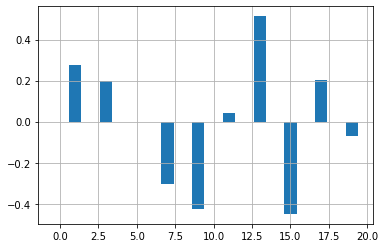

In [176]:
coefs = cheb_coef(x_cheb,y_cheb)
plt.bar(np.arange(0,len(coefs)), coefs)
plt.grid()

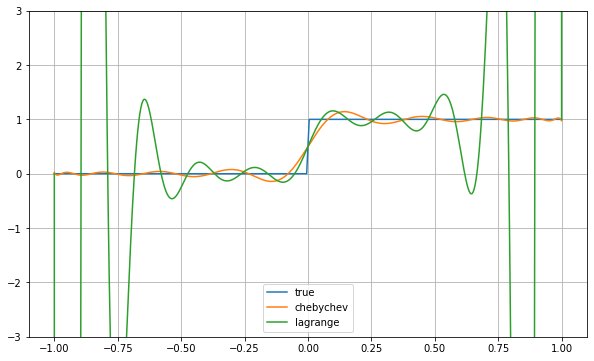

In [178]:
num_terms = 20
# define x points
x_cheb = roots_chebyt(num_terms)[0]
x_lag = np.linspace(-1,1,num_terms)
xp = np.linspace(-1,1,500)

# define y values
sign_y = np.zeros(xtest.shape)
sign_y[xtest>=0] = 1


y_cheb =  np.zeros(x_cheb.shape)
y_cheb[x_cheb>=0] = 1

y_lag =  np.zeros(x_lag.shape)
y_lag[x_lag>=0] = 1


y_res_c = cheb_interp(x_cheb, y_cheb, xp)
y_res_l = lagrange_interp(x_lag, y_lag, xp)

plt.figure(figsize=(10,6))
plt.plot(xtest,sign_y, label='true')
plt.plot(xp,y_res_c, label='chebychev')
plt.plot(xp,y_res_l, label='lagrange')
plt.grid()
plt.ylim(-3,3)
plt.legend()

In [234]:
import pandas as pd
data = pd.read_csv("AMZN (1).csv")
amzn_data = data['Close']/data['Close'].iloc[-1]

Text(0.5, 1.0, '01/01/2007-31/12/2009')

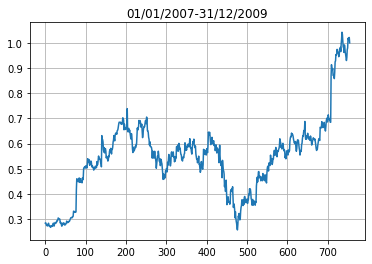

In [235]:
plt.plot(amzn_data)
plt.grid()
plt.title("01/01/2007-31/12/2009")

In [236]:
idx = np.arange(0,len(amzn_data))
x_idx = 2*(idx -idx[-1]/2)/idx[-1]

num_terms = 50
x_cheb = roots_chebyt(num_terms)[0]
linear_interpolator = interp1d(x_idx,amzn_data)
y_cheb = linear_interpolator(x_cheb)

In [237]:
y_res_c = cheb_interp(x_cheb,y_cheb,x_idx)

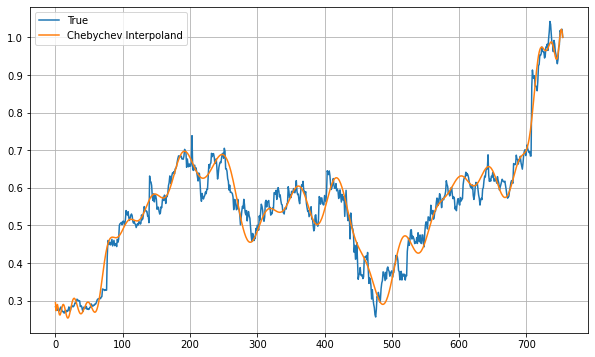

In [238]:
plt.figure(figsize=(10,6))
plt.plot(amzn_data,label='True')
plt.plot(y_res_c, label='Chebychev Interpoland')
plt.grid()
# plt.ylim(-3,3)
plt.legend()

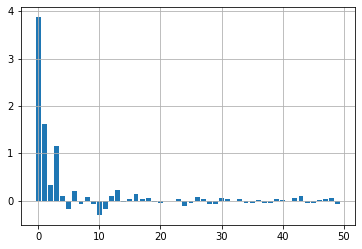

In [218]:
coefs = cheb_coef(x_cheb,y_cheb)
plt.bar(np.arange(0,len(coefs)), coefs)
plt.grid()

We clearly see 50 coefficents are more than enough to capture the stock behaviour over 3 years Including market crashes

below we do it with 25 coefficients which are pretty much enough:

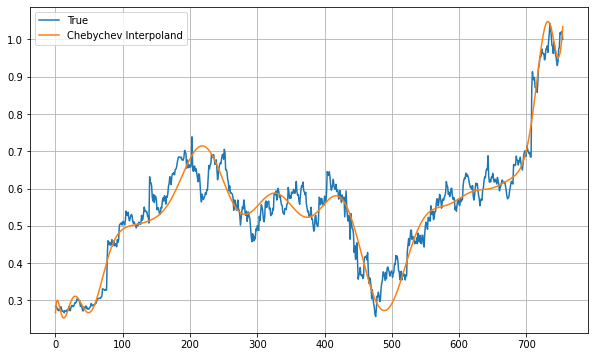

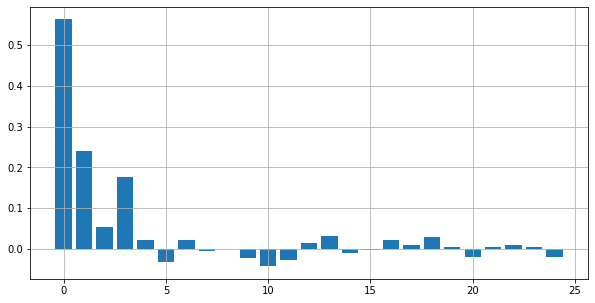

In [239]:
num_terms = 25
x_cheb = roots_chebyt(num_terms)[0]
linear_interpolator = interp1d(x_idx,amzn_data)
y_cheb = linear_interpolator(x_cheb)
y_res_c = cheb_interp(x_cheb,y_cheb,x_idx)
plt.figure(figsize=(10,6))
plt.plot(amzn_data,label='True')
plt.plot(y_res_c, label='Chebychev Interpoland')
plt.grid()
# plt.ylim(-3,3)
plt.legend()
plt.figure(figsize=(10,5))
coefs = cheb_coef(x_cheb,y_cheb)
plt.bar(np.arange(0,len(coefs)), coefs)
plt.grid()